# Business Overview
Does increase in experienceby years increase the salary 

# About the dataset
The dataset contains 2 columns

        1. YearsExperience - Which shows the years of experience in the field
        2. Salary - Showing the salary according to the experience


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset
df = pd.read_csv(r"C:\Users\Jeremy\OneDrive\Desktop\PROJECT\simple liniear reg prject\Salary_dataset.csv")

In [3]:
# Getting the first 5 rows
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [4]:
# Getting the last 5 rows
df.tail()

,Unnamed: 0,YearsExperience,Salary
25,25,9.1,105583.0
26,26,9.6,116970.0
27,27,9.7,112636.0
28,28,10.4,122392.0
29,29,10.6,121873.0


In [5]:
# Getting infomation of the datset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [6]:
# Dropping the Unnamed: 0 column
df = df.drop(columns= 'Unnamed: 0')
# Dropping the columns because it's unwanted and doesn't contain any relevant infomation

# Getting the first 5 rows after changes
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


# Modelling

In [7]:
# Getting the independent and dependent variable
X = df[['YearsExperience']] # Independent variable
y = df['Salary'] # Dependent variable

In [8]:
# Importing train, test split from sklearn
from sklearn.model_selection import train_test_split # This is for dividing our model into train set and test set 

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size= 0.3, random_state= 42) # test_size=  30% of the data is for testing 



# Standardizing the data

Standardizing the independent feature to speed up gradient descent optimization. 

Standardization applies the z-score formula to scale the data.

z-score (z) = (x - u) / s

### NOTE: To standardize, the independent variable should be in 2 arrays

In [9]:
from sklearn.preprocessing import StandardScaler # Importing StandarsScaler for standardization

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


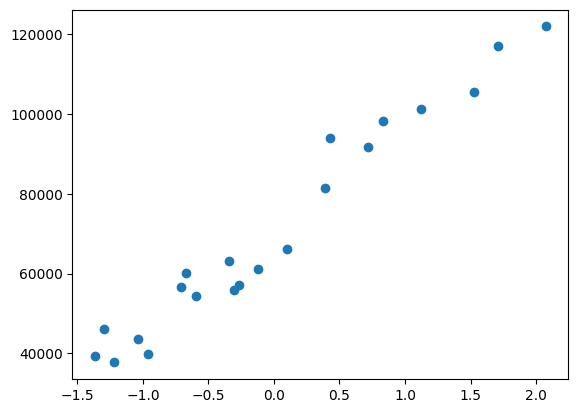

In [10]:
# Visualizing Standardized Data
plt.scatter(X_train, y_train)

In [ ]:
# Training the model
# Using Linear Regression
from sklearn.linear_model import LinearRegression

model = LinearRegression() # Inizializing Linear regression

model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [12]:
# Model Parameters
# The model finds the best fit line parameters: the intercept and the coefficient (slope)

print('Coefficient (Slope):', model.coef_[0])
print('Intercept:', model.intercept_)

Coefficient (Slope): 25511.63336019623
Intercept: 71058.33333333333


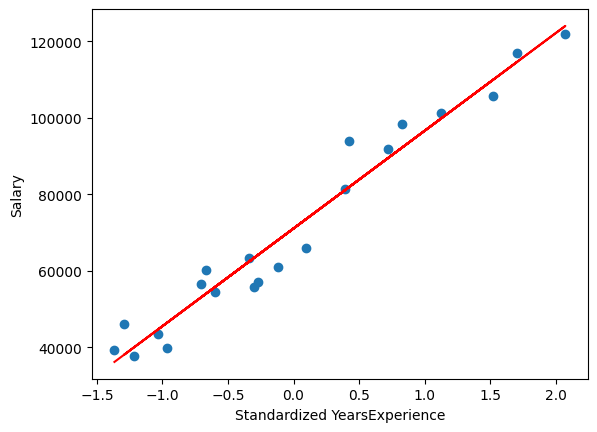

In [22]:
#Plotting the Best Fit Line
#Plotting the training data points and the best fit line predicted by the model.
plt.scatter(X_train, y_train)
plt.plot(X_train, model.predict(X_train), color='red')
plt.xlabel('Standardized YearsExperience')
plt.ylabel('Salary')
plt.show()

In [14]:
#Making Predictions on Test Data
#Using the trained model to predict heights for the test dataset.
y_pred = model.predict(X_test)
y_pred

array([115574.62288352,  71680.93878159, 102499.90847018,  75416.57147111,
        55804.4998511 ,  60474.04071301, 122111.98009019, 107169.44933209,
        63275.76523015])

In [15]:
# Creating a dataframe of the actual and predicted values
data = {'Actual': y_test.values, 'Predicted': y_pred}
pd.DataFrame(data)

,Actual,Predicted
0,112636.0,115574.622884
1,67939.0,71680.938782
2,113813.0,102499.908470
3,83089.0,75416.571471
4,64446.0,55804.499851
5,57190.0,60474.040713
6,122392.0,122111.980090
7,109432.0,107169.449332
8,56958.0,63275.765230


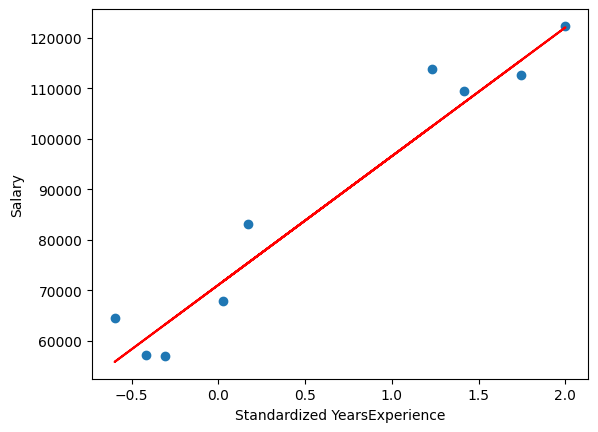

In [16]:
# Visualizing Predictions
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')
plt.xlabel('Standardized YearsExperience')
plt.ylabel('Salary')
plt.show()

# Performance Metrics

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [18]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('Root Mean Squared Error:', rmse)
print('R squared:', r2)

Mean Squared Error: 37784662.46621304
Mean Absolute Error: 5161.328710400178
Root Mean Squared Error: 6146.923007994572
R squared: 0.9414466227178215


According to the R squared the model performs at a 94% level

# Conclusion
From the model, An increase in **years of experience** leads to an increase in **Salary**

# Assumptions for a Good Regression Model


### 1. Linear Relationship: The scatter plot of actual vs predicted values should show a linear distribution.

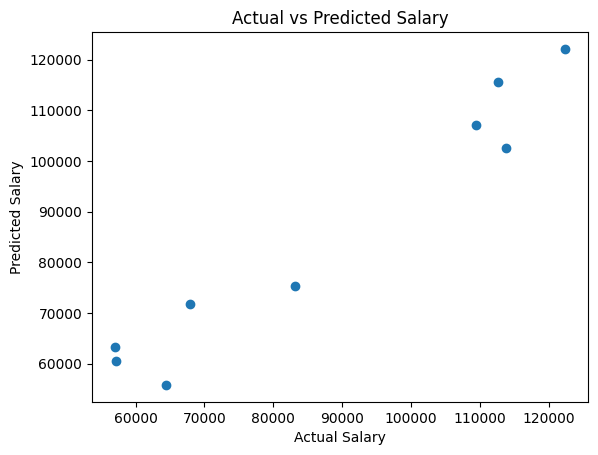

In [19]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.show()

###  2. Residuals: The residuals (differences between actual and predicted values) should be normally distributed.


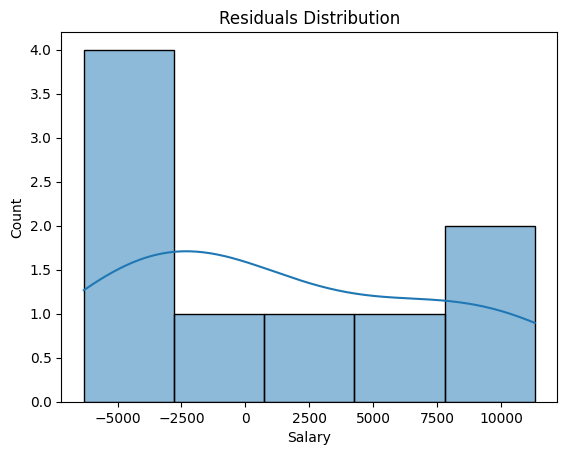

In [20]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True) # To get a histogram and kde is for the line/curve
plt.title('Residuals Distribution')
plt.show()

### 3. Uniform Distribution of Residuals: A scatter plot of residuals vs predicted values should show a uniform distribution around zero, indicating homoscedasticity.

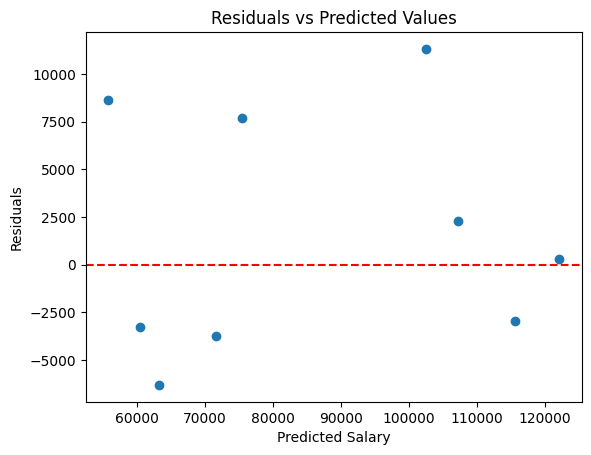

In [21]:
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--') # Getting a line on the x_axis at 0
plt.xlabel('Predicted Salary')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()